
## 퍼셉트론이란?
* 다수의 신호를 받아 하나의 신호를 출력
	* 신호는 전류나 강물처럼 **흐름**이 있는 것의 개념이다.
	* 전류가 전선을 타고 전자를 흘려보내듯, 퍼셉트론 신호도 흐름을 만들고 정보를 앞으로 전달한다.
*  퍼셉트론 신호는 흐른다(1)/흐르지 않는다(0) 두 가지 값으로 구분된다.

입력신호를 x, 가중치를 w, 출력 신호르 y라고 하면 y = wx 로 표현이 가능하다.
y = 1 (w₁x₁ + w₂x₂ + ⋯ wₙxₙ > θ) : 뉴런 활성화
y = 0 (w₁x₁ + w₂x₂ + ⋯ wₙxₙ <= θ) : 뉴런 비활성화
퍼셉트론의 가중치가 클수록 강한 신호를 흘려보낸다.

## 단순한 논리 회로

### AND 게이트
* AND 게이트: 입력 값 두 개 모두 1이면 1출력
* 진리표  
	x₁    x₂    y  
	0      0    0  
	1      0    0  
	0      1    0  
	1      1    1  
* (w₁, w₂, θ)의 w₁와 w₂의 합이 θ를 초과하면 AND 게이트의 조건을 만족한다.
	* ex) (0.1, 0.1, 0.1)

### NAND 게이트와 OR 게이트
* NAND 게이트: AND 게이트의 출력을 뒤집은 것이다.
*  진리표  
	x₁    x₂    y  
	0      0    1  
	1      0    1  
	0      1    1  
	1      1    0
	ex) (-0.1,-0.1,-0.1) : AND 게이트 매개변수의 부호를 반전
* OR 게이트: 입력값 중 1개 이상이 1이면 1출력
* 진리표  
	x₁    x₂    y  
	0      0    0  
	1      0    1  
	0      1    1  
	1      1    1
	ex) (1, -0.5, 0.1)??

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7  # (0.5, 0.5, 0.7)
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [4]:
AND(0,0),AND(1,0),AND(0,1),AND(1,1)

(0, 0, 0, 1)

앞서 구현한 AND 게이트를 다른 방식으로 수정해본다.
θ를 -b로 치환하면 퍼셉트론의 동작을 다음과 같이 표현할 수 있다.
* y = 1 (b + w₁x₁ + w₂x₂ + ⋯ wₙxₙ > 0) : 뉴런 활성화 
* y = 0 (b + w₁x₁ + w₂x₂ + ⋯ wₙxₙ <= 0) : 뉴런 비활성화  

여기에서 b를 '편향'이라고 표현하며, w는 그대로 가중치이다.

In [5]:
import numpy as np
x = np.array([0,1]) # 입력
w = np.array([0.5,0.5]) # 가중치 -- 가중치는 기울기?
b = -0.7 # 편향
w*x

array([0. , 0.5])

In [6]:
np.sum(w*x)

0.5

In [7]:
np.sum(w*x) + b

-0.19999999999999996

* numpy 배열끼리의 연산은 원소 개수가 같다면 각 원소끼리 연산한다.

### 가중치와 편향 구현하기

In [10]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.7
    
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

* 가중치 w는 각 입력신호가 결과에 주는 영향력을 조절하는 매개변수이다.
* 편향은 뉴런이 얼마나 쉽게 활성화를 하느냐를 조정하는 매개변수이다.  - 뉴런 활성화 여부를 결정하는 기준치라고 볼 수 있나?


In [11]:
AND(0,0),AND(1,0),AND(0,1),AND(1,1)

(0, 0, 0, 1)

In [12]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [13]:
NAND(0,0),NAND(1,0),NAND(0,1),NAND(1,1)

(1, 1, 1, 0)

In [14]:
OR(0,0),OR(1,0),OR(0,1),OR(1,1)

(0, 1, 1, 1)

## 퍼셉트론의 한계
XOR 게이튼는 **배타적 논리합**이라는 논리 회로이다.
	x₁    x₂    y  
	0      0    0  
	1      0    1  
	0      1    1  
	1      1    0  
$x_1$과 $x_2$ 중 한 쪽이 1일 때만 1을 출력한다.
그래프 나중에 추가

퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있어 배타적 논리합은 표현할 수 없다.
하지만 이러한 한계는 단층 퍼셉트론이 가지고 있을 뿐, 다층 퍼셉트론을 이용하면 한계를 극복할 수 있다.

$x_1  x_2  s_1  s_2  y$  
0      0    1    0   0     
1      0    1    1   1   
0      1    1    1   1  
1      1    0    0   0  



## XOR 게이트 구현하기

In [15]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [16]:
XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1)

(0, 1, 1, 0)

나중에 그림 추가!

다층 퍼셉트론의 동작은 다음과 같다.
* 0층의 두 뉴런이 입력신호를 받아 1층의 뉴런으로 신호를 보낸다.
* 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 최종 층의 뉴런은 y를 출력한다.

## 퍼셉트론에서 신경망으로

$$
y = h(b + w_1x_1 + w_2x_2)
$$
* $h(x) = 0 (x <= 0)$
* $h(x) = 1 (x > 0)$

이러한 $h()$ 함수를 **활성화 함수**라고 한다.  
위와 같이 임계값을 경계로 출력이 바뀌는 함수를 **계단 함수**라고 한다.  
다시 정의하자면 '**퍼셉트론은 활성화 함수로 계단 함수를 이용한다.**'이다.  
* 시그모이드 함수: $1\over 1+ exp(-x)$
    * $exp(-x) = e^{-x}$
    * $e = 2.7182...$
$$
h(x) = {e^x\over e^x + 1}
$$

In [21]:
def step_function(x):
#     if x > 0:
#         return 1
#     else:
#         return 0
    y = x > 0
    return y.astype(np.int)

import numpy as np

x = np.array([-1.0, 1.0, 2.0])
print(x)

y = x > 0
y = y.astype(int)
y

[-1.  1.  2.]


array([0, 1, 1])

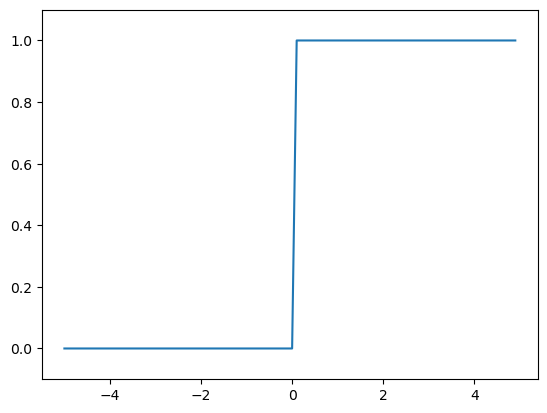

In [22]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

* 계단 함수가 계단 함수로 불리우는 이유